Text(0.5, 1.0, 'I love Matplotlib & Pandas MAK MAK')

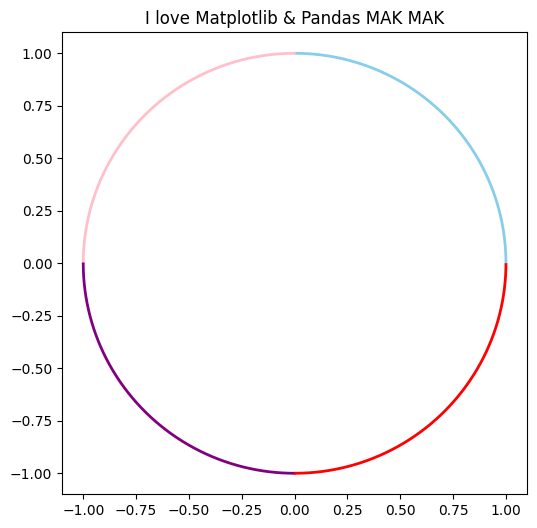

In [43]:
## Matplotlib
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0, 2 * np.pi, 1000)
r = 1
x = r * np.cos(theta)
y = r * np.sin(theta)

regions = [
    (0, np.pi/2, 'skyblue'),       # ซีกขวาบน
    (np.pi/2, np.pi, 'pink'),      # ซีกซ้ายบน
    (np.pi, 3*np.pi/2, 'purple'),  # ซีกซ้ายล่าง
    (3*np.pi/2, 2*np.pi, 'red')    # ซีกขวาล่าง
]

plt.figure(figsize=(6, 6))
for start, end, color in regions:
    mask = (theta >= start) & (theta < end)
    plt.plot(x[mask], y[mask], color=color, linewidth=2)

plt.title("I love Matplotlib & Pandas MAK MAK")

In [32]:
## Pandas
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("shivamb/netflix-shows")

print("Path to dataset files:", path)
print(os.listdir(path))

Path to dataset files: /kaggle/input/netflix-shows
['netflix_titles.csv']


In [33]:
file_path = os.path.join(path, os.listdir(path)[0])
df = pd.read_csv(file_path)

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [34]:
missing_counts = df.isnull().sum()
missing_counts

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


<Axes: >

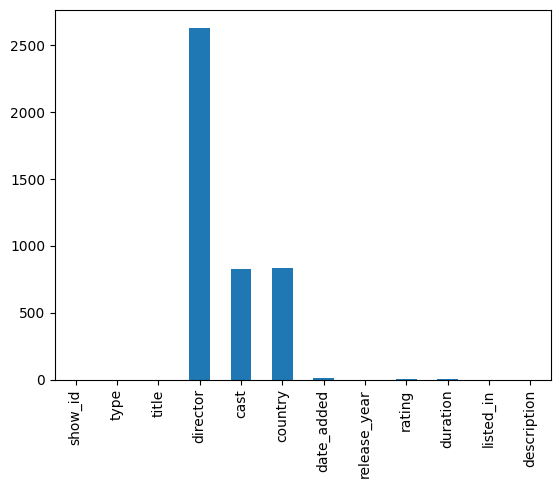

In [35]:
missing_counts.plot.bar()

In [36]:
cols_to_dropna = missing_counts[missing_counts > 2000].index
cols_to_dropna

Index(['director'], dtype='object')

In [37]:
df_cleaned = df.dropna(subset=cols_to_dropna)
missing_counts_af = df_cleaned.isnull().sum()
missing_counts_af

,0
show_id,0
type,0
title,0
director,0
cast,473
country,422
date_added,0
release_year,0
rating,1
duration,3


<Axes: >

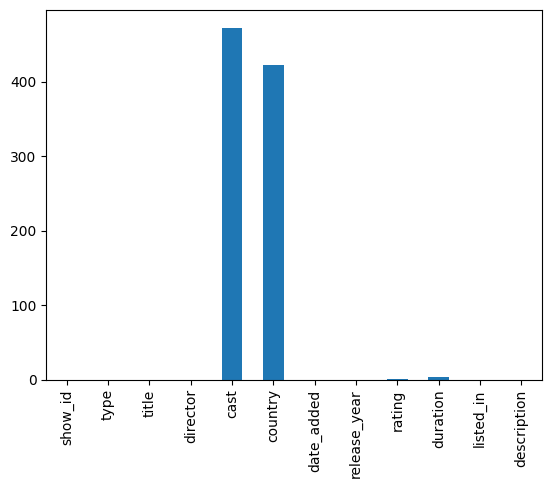

In [38]:
missing_counts_af.plot.bar()